In [1]:
# magic is required to fix figure.dpi
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.dpi']

100.0

### Figure 1.1 - Anatomy of a figure

https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/anatomy.py

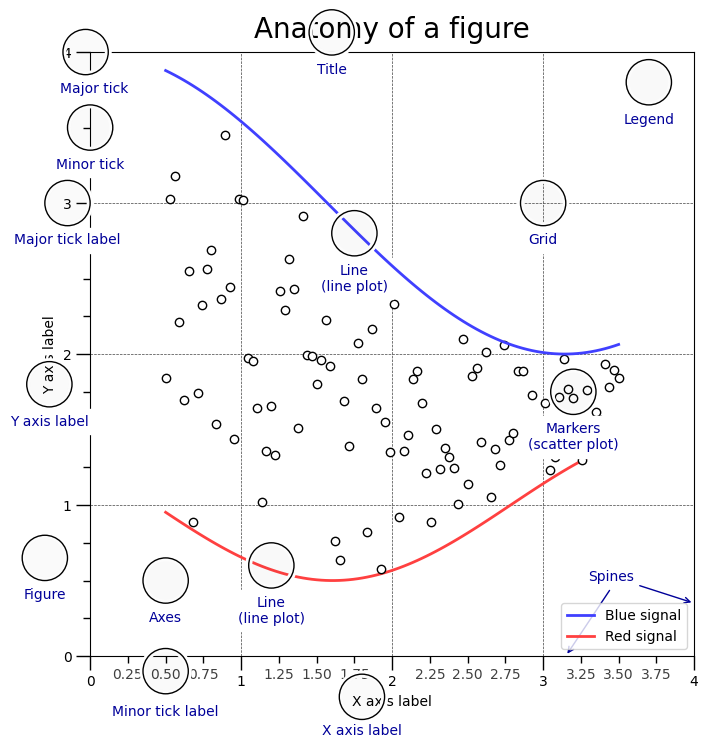

In [3]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(123)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x


ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which="major", width=1.0)
ax.tick_params(which="major", length=10)
ax.tick_params(which="minor", width=1.0, labelsize=10)
ax.tick_params(which="minor", length=5, labelsize=10, labelcolor="0.25")

ax.grid(linestyle="--", linewidth=0.5, color=".25", zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0, marker="o", markerfacecolor="w", markeredgecolor="k")

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment="bottom")
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke

    circle = Circle(
        (x, y),
        radius,
        clip_on=False,
        zorder=10,
        linewidth=1,
        edgecolor="black",
        facecolor=(0, 0, 0, 0.0125),
        path_effects=[withStroke(linewidth=5, foreground="w")],
    )
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(
        x,
        y,
        text,
        backgroundcolor="white",
        # fontname="Yanone Kaffeesatz", fontsize="large",
        ha="center",
        va="top",
        weight="regular",
        color="#000099",
    )


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = "#000099"
ax.annotate(
    "Spines",
    xy=(4.0, 0.35),
    xytext=(3.3, 0.5),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

ax.annotate(
    "",
    xy=(3.15, 0.0),
    xytext=(3.45, 0.45),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

plt.savefig("../../figures/01-anatomy/anatomy.pdf")
plt.show()

### Figure 1.2 - Bold tick label

https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/bold-ticklabel.py

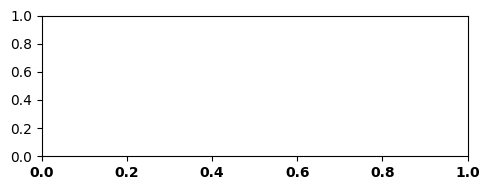

In [4]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 2))
for label in ax.get_xaxis().get_ticklabels():
    label.set_fontweight("bold")

plt.tight_layout()
plt.savefig("../../figures/01-anatomy/bold-ticklabel.pdf")
plt.show()

### Figure 1.3 - Z-order

https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/zorder.py

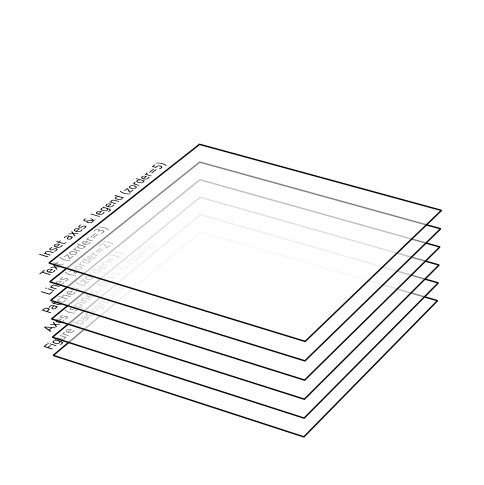

In [5]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Rectangle, PathPatch


def text3d(ax, xyz, s, zdir="z", size=None, angle=0, **kwargs):
    x, y, z = xyz
    if zdir == "y":
        x, y, z = x, z, y
    elif zdir == "x":
        x, y, z = y, z, x
    else:
        x, y, z = x, y, z
    text_path = TextPath((0, 0), s, size=size)
    trans = Affine2D().rotate(angle).translate(x, y)
    p = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=z, zdir=zdir)


fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection="3d", xticks=[], yticks=[], zticks=[])
ax.set_axis_off()
ax.set_xlim(0, 10), ax.set_ylim(0, 10), ax.set_zlim(0, 10)

for i, text in enumerate(
    [
        "Figure (background)",
        "Axes (spines, ticks & labels)",
        "Patches (zorder=1)",
        "Lines (zorder=2)",
        "Text (zorder=3)",
        "Inset axes & legend (zorder=5)",
    ]
):
    p = Rectangle((0, 0), 10, 10, edgecolor="None", facecolor="white", alpha=0.5)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=i, zdir="z")

    p = Rectangle((0, 0), 10, 10, edgecolor="black", facecolor="None")
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=i, zdir="z")

    text3d(
        ax,
        (-0.25, 0.25, i),
        text,
        zdir="z",
        size=0.5,
        angle=np.pi / 2,
        ec="none",
        fc="k",
    )

plt.savefig("../../figures/01-anatomy/zorder.pdf")
plt.show()

### Figure 1.4 - Raster vs vector graphics

https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/raster-vector.py

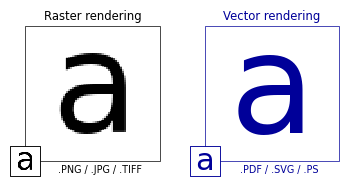

In [6]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.patches import Rectangle


def pixelated_text(dpi=100):
    fig = Figure(figsize=(1, 1), dpi=dpi)
    canvas, ax = FigureCanvasAgg(fig), fig.gca()
    ax.text(0.5, 0.5, "a", fontsize=75, ha="center", va="center")
    ax.axis("off")
    canvas.draw()
    image = np.frombuffer(canvas.tostring_argb(), dtype="uint8")
    image = image.reshape(dpi, dpi, 4)
    image = np.roll(image, 3, axis=2)
    return image


def square(position, size, edgecolor, facecolor, zorder):
    rect = Rectangle(
        position,
        size,
        size,
        transform=ax.transAxes,
        clip_on=False,
        zorder=zorder,
        linewidth=0.5,
        edgecolor=edgecolor,
        facecolor=facecolor,
    )
    ax.add_artist(rect)


image = pixelated_text(75)
fig = plt.figure(figsize=(4.25, 2), dpi=100)

# Left (raster)
ax = plt.subplot(
    1, 2, 1, frameon=False, aspect=1, xticks=[], yticks=[], xlim=[0, 1], ylim=[0, 1]
)

ax.imshow(image, extent=[0.1, 1.0, 0.1, 1.0], zorder=10, interpolation="nearest")
square((0.1, 0.1), 0.9, "black", "None", 20)

square((0.0, 0.0), 0.2, "black", "white", 20)
ax.imshow(image, extent=[0.0, 0.2, 0.0, 0.2], zorder=30, interpolation="nearest")
square((0.0, 0.0), 0.2, "black", "None", 40)

ax.text(0.55, 1.025, "Raster rendering", fontsize="small", ha="center", va="bottom")
ax.text(
    0.6, 0.1 - 0.025, ".PNG / .JPG / .TIFF", fontsize="x-small", ha="center", va="top"
)

# Right (vector)
ax = plt.subplot(
    1, 2, 2, frameon=False, aspect=1, xticks=[], yticks=[], xlim=[0, 1], ylim=[0, 1]
)
ax.text(0.55, 0.55, "a", fontsize=100, ha="center", va="center", color="#000099")
square((0.1, 0.1), 0.9, "#000099", "None", 20)
square((0.0, 0.0), 0.2, "#000099", "white", 20)
ax.text(
    0.1,
    0.1,
    "a",
    fontsize=22,
    ha="center",
    va="center",
    clip_on=False,
    zorder=30,
    color="#000099",
)
square((0.0, 0.0), 0.2, "#000099", "None", 40)

ax.text(
    0.55,
    1.025,
    "Vector rendering",
    fontsize="small",
    ha="center",
    va="bottom",
    color="#000099",
)
ax.text(
    0.6,
    0.1 - 0.025,
    ".PDF / .SVG / .PS",
    fontsize="x-small",
    ha="center",
    va="top",
    color="#000099",
)


plt.savefig("../../figures/01-anatomy/raster-vector.pdf", dpi=600)
plt.show()

### Figure 1.5 - Matplotlib imgcat backend

https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/imgcat.py

OSX and iterm2 are required

### Figure 1.6 - Text saved usind different dpi

**Install Source Serif Pro for Ubuntu 20.04**

- Stop Jupyter Lab
- Install font
```bash
mkdir /tmp/adodefont
cd /tmp/adodefont
mkdir -p ~/.fonts
wget https://github.com/adobe-fonts/source-serif-pro/archive/2.000R.zip
unzip 2.000R.zip
cp source-serif-2.000R/OTF/*.otf ~/.fonts
fc-cache -rv
fc-list : family | sort | uniq
```
- Remove matplotlib cache
```bash
rm -rf ~/.cache matplotlib
```
- Start Jupyter Lab

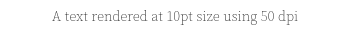

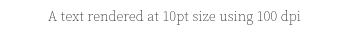

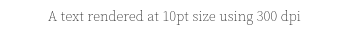

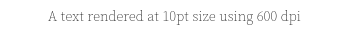

In [48]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: Creative Commons BY-NC-SA International 4.0
# ----------------------------------------------------------------------------
import matplotlib.pyplot as plt


def figure(dpi):
    fig = plt.figure(figsize=(4.25, 0.2))
    ax = plt.subplot(1, 1, 1, frameon=False)
    plt.xticks([]), plt.yticks([])
    text = "A text rendered at 10pt size using {0} dpi".format(dpi)
    ax.text(
        0.5,
        0.5,
        text,
        fontname="Source Serif Pro",
        ha="center",
        va="center",
        fontsize=10,
        fontweight="light",
    )
    plt.savefig("../../figures/01-anatomy/figure-dpi-{0:03d}.png".format(dpi), dpi=dpi)

    
figure(50)
figure(100)
figure(300)
figure(600)

# Using ImageMagick
# convert -resize 2550x -append figure-dpi-*.png figure-dpi.png

In [49]:
!convert -resize 2550x -append ../../figures/01-anatomy/figure-dpi-*.png ../../figures/01-anatomy/figure-dpi.png

In [50]:
!identify ../../figures/01-anatomy/figure-dpi*.png

../../figures/01-anatomy/figure-dpi-050.png PNG 212x10 212x10+0+0 8-bit sRGB 977B 0.000u 0:00.000
../../figures/01-anatomy/figure-dpi-100.png PNG 425x20 425x20+0+0 8-bit sRGB 2481B 0.000u 0:00.000
../../figures/01-anatomy/figure-dpi-300.png PNG 1275x60 1275x60+0+0 8-bit sRGB 10051B 0.000u 0:00.000
../../figures/01-anatomy/figure-dpi-600.png PNG 2550x120 2550x120+0+0 8-bit sRGB 21533B 0.000u 0:00.000
../../figures/01-anatomy/figure-dpi.png PNG 2550x480 2550x120+0+0 8-bit Grayscale Gray 108786B 0.000u 0:00.000


### Figure 1.7 - Ruler

https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/ruler.py

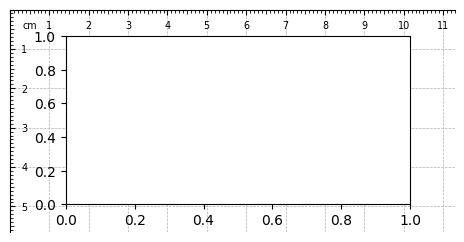

In [96]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


class Ruler:
    """ Ruler add a whole figure axis whose ticks indicate figure
        dimensions and adapt itself to figure resize event.
    """

    def __init__(self, fig=None):
        self.fig = fig or plt.gcf()
        self.ax = None
        self.show()

    def show(self):

        if self.ax is None:
            ax = fig.add_axes([0, 0, 1, 1], zorder=-10, facecolor="None")
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_visible(False)

            ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
            ax.tick_params(
                axis="x", which="both", labelsize="x-small", direction="in", pad=-15
            )
            ax.xaxis.tick_top()

            ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
            ax.yaxis.tick_left()
            ax.tick_params(
                axis="y", which="both", labelsize="x-small", direction="in", pad=-8
            )
            ax.yaxis.tick_left()
            for label in ax.yaxis.get_ticklabels():
                label.set_horizontalalignment("left")

            self.text = ax.text(
                0.5, 0.4, "cm", ha="center", va="center", size="x-small"
            )
            ax.grid(linestyle="--", linewidth=0.5)

            self.ax = ax

        self.update()
        plt.connect("resize_event", self.update)

    def update(self, *args):

        inch = 2.54
        width_cm = self.fig.get_figwidth() * inch
        height_cm = self.fig.get_figheight() * inch

        n = int(width_cm) + 1
        self.ax.set_xlim(0, width_cm)
        self.ax.set_xticks(np.arange(n))
        self.ax.set_xticklabels([""] + ["%d" % x for x in np.arange(1, n)])

        markersize = self.ax.xaxis.get_ticklines(True)[0].get_markersize()
        for line in self.ax.xaxis.get_ticklines(True)[2::9]:
            line.set_markersize(1.5 * markersize)

        n = int(height_cm) + 1
        self.ax.set_ylim(height_cm, 0)
        self.ax.set_yticks(np.arange(n))
        self.ax.set_yticklabels([""] + ["%d" % y for y in np.arange(1, n)])

        markersize = self.ax.yaxis.get_ticklines(True)[0].get_markersize()
        for line in self.ax.yaxis.get_ticklines(True)[1::9]:
            line.set_markersize(1.5 * markersize)


# width = page width - left margin - right margin
width = (14.8 - 1.5 - 2.0) / 2.54
height = width / 2

fig = plt.figure(figsize=(width, height), dpi=100)
ax = plt.subplot()
ruler = Ruler()

plt.savefig("../../figures/01-anatomy/ruler.pdf")
plt.show()